In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import palette, ndim_models_order

In [9]:
dataset = "alyawarra"

In [10]:
df = pd.read_csv(f'../results/{dataset}_x_results_auc.csv', index_col=0)

# if degree_correction, add DC to model name
df['model'] = df.apply(lambda row: f"DC{row['model']}" if row['degree_correction'] else row['model'], axis=1)

df.head()

,auc,prauc,model,iteration,degree_correction
0,0.980616,0.312876,NAA,0,False
1,0.980513,0.302413,NSBM,0,False
2,0.980447,0.336241,DCNAA,0,True
3,0.980092,0.333970,DCNSBM,0,True
4,0.983007,0.321634,NAA,1,False


/var/folders/tj/q2qz82qj46qf7mwzd_jqkxnc0000gn/T/ipykernel_14112/1427424560.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  g = sns.boxplot(


AttributeError: 'Axes' object has no attribute 'fig'

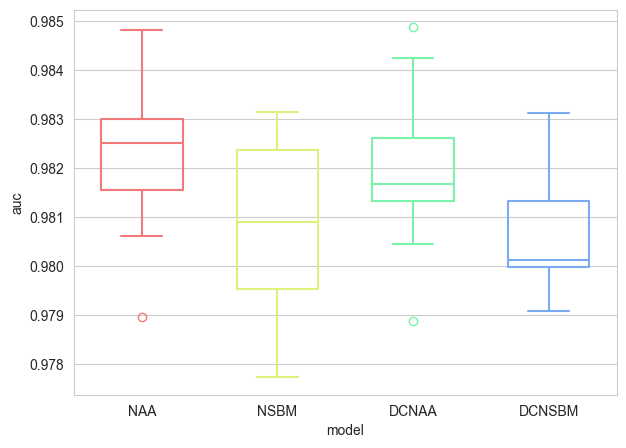

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))

g = sns.boxplot(
    df,
    x = 'model',
    order=ndim_models_order,
    y='auc',
    hue='model',
    hue_order=ndim_models_order,
    palette=palette,
    fill=False,
    gap=.25,
    ax=ax,
    legend=True
)

# get the legend
handles, labels = g.get_legend_handles_labels()
g.legend_.remove()

fig.subplots_adjust(bottom=.2)

# plot the legend lower, center of the whole figure
fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, 0))

# save figure
# plt.savefig(f'figures/{dataset}_boxplot.pdf', dpi=300)

plt.show()

In [46]:
df = pd.read_csv(f'../results/{dataset}_x_results_loss.csv')
# if degree_correction, add DC to model name
df['model'] = df.apply(lambda row: f"DC{row['model']}" if row['degree_correction'] else row['model'], axis=1)

# df = df.groupby(['model', 'step']).mean().reset_index()
df.head()

,Unnamed: 0,loss,step,model,iteration,degree_correction
0,0,39249.273438,0,NAA,0,False
1,1,38065.882812,20,NAA,0,False
2,2,36040.500000,40,NAA,0,False
3,3,34270.203125,60,NAA,0,False
4,4,32132.644531,80,NAA,0,False


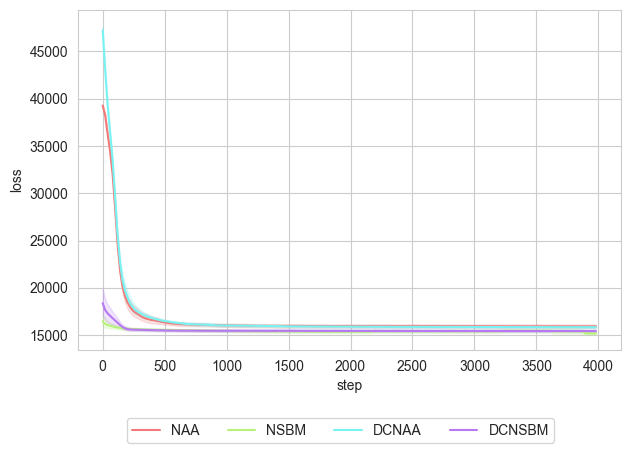

In [47]:
fig, ax = plt.subplots(figsize=(7, 5))

g = sns.lineplot(
    df,
    x='step',
    y='loss',
    hue='model',
    hue_order=ndim_models_order,
    palette=palette,
    ax=ax
)

# get the legend
handles, labels = g.get_legend_handles_labels()
g.legend_.remove()

fig.subplots_adjust(bottom=.2)

# plot the legend lower, center of the whole figure
fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, 0))

# save figure fig
# fig.savefig(f'figures/{dataset}_loss.pdf', dpi=300)

plt.show()